In [1]:
import numpy as np
from collections import defaultdict
data_path ='ratings.dat'
n_users = 6040
n_movies = 3706

In [2]:
def load_rating_data(data_path, n_users, n_movies):
    """
    Load rating data from file and also return the number of 
        ratings for each movie and movie_id index mapping
    @param data_path: path of the rating data file
    @param n_users: number of users
    @param n_movies: number of movies that have ratings
    @return: rating data in the numpy array of [user, movie]; 
             movie_n_rating, {movie_id: number of ratings};
             movie_id_mapping, {movie_id: column index in 
                rating data}
    """
    data = np.zeros([n_users, n_movies], dtype=np.float32)
    movie_id_mapping = {}
    movie_n_rating = defaultdict(int)
    with open(data_path, 'r') as file:
        for line in file.readlines():
            user_id, movie_id, rating, _ = line.split("::")
            user_id = int(user_id) - 1
            if movie_id not in movie_id_mapping:
                movie_id_mapping[movie_id] = len(movie_id_mapping)    
            rating = int(rating)
            data[user_id, movie_id_mapping[movie_id]] = rating
            if rating > 0:
                movie_n_rating[movie_id] += 1
    return data, movie_n_rating, movie_id_mapping


In [3]:
data, movie_n_rating, movie_id_mapping = load_rating_data(data_path, n_users, n_movies)

In [4]:
data

array([[5., 3., 3., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
movie_n_rating

defaultdict(int,
            {'1193': 1725,
             '661': 525,
             '914': 636,
             '3408': 1315,
             '2355': 1703,
             '1197': 2318,
             '1287': 704,
             '2804': 1352,
             '594': 763,
             '919': 1718,
             '595': 1060,
             '938': 187,
             '2398': 380,
             '2918': 1473,
             '1035': 882,
             '2791': 1731,
             '2687': 442,
             '2018': 589,
             '3105': 680,
             '2797': 1491,
             '2321': 1158,
             '720': 438,
             '1270': 2583,
             '527': 2304,
             '2340': 344,
             '48': 382,
             '1097': 2269,
             '1721': 1546,
             '1545': 73,
             '745': 657,
             '2294': 645,
             '3186': 431,
             '1566': 469,
             '588': 1351,
             '1907': 490,
             '783': 390,
             '1836': 135,
             '1022'

In [6]:
movie_id_mapping

{'1193': 0,
 '661': 1,
 '914': 2,
 '3408': 3,
 '2355': 4,
 '1197': 5,
 '1287': 6,
 '2804': 7,
 '594': 8,
 '919': 9,
 '595': 10,
 '938': 11,
 '2398': 12,
 '2918': 13,
 '1035': 14,
 '2791': 15,
 '2687': 16,
 '2018': 17,
 '3105': 18,
 '2797': 19,
 '2321': 20,
 '720': 21,
 '1270': 22,
 '527': 23,
 '2340': 24,
 '48': 25,
 '1097': 26,
 '1721': 27,
 '1545': 28,
 '745': 29,
 '2294': 30,
 '3186': 31,
 '1566': 32,
 '588': 33,
 '1907': 34,
 '783': 35,
 '1836': 36,
 '1022': 37,
 '2762': 38,
 '150': 39,
 '1': 40,
 '1961': 41,
 '1962': 42,
 '2692': 43,
 '260': 44,
 '1028': 45,
 '1029': 46,
 '1207': 47,
 '2028': 48,
 '531': 49,
 '3114': 50,
 '608': 51,
 '1246': 52,
 '1357': 53,
 '3068': 54,
 '1537': 55,
 '647': 56,
 '2194': 57,
 '648': 58,
 '2268': 59,
 '2628': 60,
 '1103': 61,
 '2916': 62,
 '3468': 63,
 '1210': 64,
 '1792': 65,
 '1687': 66,
 '1213': 67,
 '3578': 68,
 '2881': 69,
 '3030': 70,
 '1217': 71,
 '434': 72,
 '2126': 73,
 '3107': 74,
 '3108': 75,
 '3035': 76,
 '1253': 77,
 '1610': 78,
 '292'

In [7]:
def display_distribution(data):
    values, counts = np.unique(data, return_counts=True)
    for value, count in zip(values, counts):
        print(f'Number of rating {int(value)}: {count}')
display_distribution(data)

Number of rating 0: 21384031
Number of rating 1: 56174
Number of rating 2: 107557
Number of rating 3: 261197
Number of rating 4: 348971
Number of rating 5: 226310


In [8]:
movie_id_most, n_rating_most = sorted(movie_n_rating.items(), key=lambda d: d[1], reverse=True)[0]
print(f'Movie ID {movie_id_most} has {n_rating_most} ratings.')

Movie ID 2858 has 3428 ratings.


In [9]:
X_raw = np.delete(data, movie_id_mapping[movie_id_most], axis=1)
Y_raw = data[:, movie_id_mapping[movie_id_most]]

In [10]:
data.shape

(6040, 3706)

In [11]:
X_raw.shape

(6040, 3705)

In [12]:
Y_raw

array([0., 4., 4., ..., 0., 0., 4.], dtype=float32)

In [13]:
Y_raw.shape

(6040,)

In [14]:
X = X_raw[Y_raw > 0]
Y = Y_raw[Y_raw > 0]
print('Shape of X:', X.shape)

Shape of X: (3428, 3705)


In [15]:
print('Shape of Y:', Y.shape)

Shape of Y: (3428,)


In [16]:
Y

array([4., 4., 4., ..., 5., 4., 4.], dtype=float32)

In [17]:
display_distribution(Y)

Number of rating 1: 83
Number of rating 2: 134
Number of rating 3: 358
Number of rating 4: 890
Number of rating 5: 1963


In [18]:
recommend = 3
Y[Y <= recommend] = 0
Y[Y > recommend] = 1
n_pos = (Y == 1).sum()
n_neg = (Y == 0).sum()
print(f'{n_pos} positive samples and {n_neg} negative samples.')

2853 positive samples and 575 negative samples.


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,\
                                                    test_size=0.2, random_state=42)

In [20]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(X_train, Y_train)

MultinomialNB()

In [21]:
print(len(Y_train), len(Y_test))

2742 686


In [22]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 2., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
prediction_prob = clf.predict_proba(X_test)
print(prediction_prob[:20])

[[7.50487439e-23 1.00000000e+00]
 [1.01806208e-01 8.98193792e-01]
 [3.57740570e-10 1.00000000e+00]
 [1.00000000e+00 2.94095407e-16]
 [1.00000000e+00 2.49760836e-25]
 [7.62630220e-01 2.37369780e-01]
 [3.47479627e-05 9.99965252e-01]
 [2.66075292e-11 1.00000000e+00]
 [5.88493563e-10 9.99999999e-01]
 [9.71326867e-09 9.99999990e-01]
 [9.90903825e-01 9.09617454e-03]
 [1.52177864e-35 1.00000000e+00]
 [1.68460965e-06 9.99998315e-01]
 [9.12855915e-13 1.00000000e+00]
 [1.37348732e-09 9.99999999e-01]
 [3.60059577e-08 9.99999964e-01]
 [4.88274352e-14 1.00000000e+00]
 [1.77740526e-02 9.82225947e-01]
 [1.00000000e+00 1.46860153e-55]
 [6.38257065e-27 1.00000000e+00]]


In [24]:
prediction = clf.predict(X_test)
print(prediction[:])

[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.

In [25]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

The accuracy is: 71.6%


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, prediction, labels=[0, 1]))

[[ 60  47]
 [148 431]]


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(Y_test, prediction, pos_label= 1) 

0.9016736401673641

In [28]:
 recall_score(Y_test, prediction, pos_label=1) 

0.7443868739205527

In [29]:
f1_score(Y_test, prediction) 

0.815515610217597

In [30]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

         0.0       0.29      0.56      0.38       107
         1.0       0.90      0.74      0.82       579

    accuracy                           0.72       686
   macro avg       0.60      0.65      0.60       686
weighted avg       0.81      0.72      0.75       686



In [31]:
pos_prob = prediction_prob[:, 1]
thresholds = np.arange(0.0, 1.1, 0.05)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, Y_test):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
           # if truth and prediction are both 1
            if y == 1:
                true_pos[i] += 1
           # if truth is 0 while prediction is 1
            else:
                false_pos[i] += 1
        else:
            break

In [32]:
n_pos_test = (Y_test == 1).sum()
n_neg_test = (Y_test == 0).sum()
true_pos_rate = [tp / n_pos_test for tp in true_pos]
false_pos_rate = [fp / n_neg_test for fp in false_pos]

No handles with labels found to put in legend.


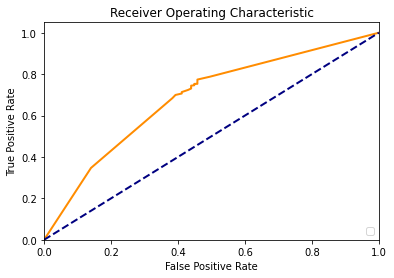

In [33]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
k = 5
k_fold = StratifiedKFold(n_splits=k, random_state=42,shuffle = True)

In [35]:
smoothing_factor_option = [1, 2, 3, 4, 5, 6]
fit_prior_option = [True, False]
auc_record = {}

In [36]:
for train_indices, test_indices in k_fold.split(X, Y):
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]
    for alpha in smoothing_factor_option:
        if alpha not in auc_record:
            auc_record[alpha] = {}
        for fit_prior in fit_prior_option:
            clf = MultinomialNB(alpha=alpha, 
                                fit_prior=fit_prior)
            clf.fit(X_train, Y_train)
            prediction_prob = clf.predict_proba(X_test)
            pos_prob = prediction_prob[:, 1]
            auc = roc_auc_score(Y_test, pos_prob)
            auc_record[alpha][fit_prior] = auc + auc_record[alpha].get(fit_prior, 0.0)


In [37]:
for smoothing, smoothing_record in auc_record.items():
    for fit_prior, auc in smoothing_record.items():
        print(f'    {smoothing}        {fit_prior}    {auc/k:.5f}')

    1        True    0.65280
    1        False    0.65274
    2        True    0.65108
    2        False    0.65274
    3        True    0.65313
    3        False    0.65322
    4        True    0.65397
    4        False    0.65430
    5        True    0.65455
    5        False    0.65448
    6        True    0.65478
    6        False    0.65404


In [38]:
clf = MultinomialNB(alpha=2.0, fit_prior=False)
clf.fit(X_train, Y_train)
pos_prob = clf.predict_proba(X_test)[:, 1]
print('AUC with the best model:', roc_auc_score(Y_test, pos_prob))

AUC with the best model: 0.6468726163234173
